# **Exercise - Decision Trees Analysis**
# DATA 3300

## Name: Chance Wiese

**Begin by importing the required libraries and packages, as well as the full `griselmoor.csv` dataset.**

**Then use the `train_test_split` function from `sklearn` to split your IVs and DV into training and test sets with a 80-20 split.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

import seaborn as sns
import graphviz

In [2]:
# replace with code to read in the dataset
df = pd.read_csv('/content/griselmoor.csv')
# replace with code to display the dataframe heading
df.head()

,bridgeid,material,age,length,mosscover,covered,cursed,waterbody,guardian
0,1,stone,2.5,4.5,0.8,n,y,river,troll
1,2,stone,3.8,3.1,0.5,n,y,marsh,squirrel
2,3,wood,2.1,4.4,0.6,n,n,marsh,troll
3,4,wood,1.2,2.2,0.6,n,n,creek,squirrel
4,5,brick,2.6,3.8,0.9,n,n,river,troll


In [3]:
x = df.drop(['bridgeid', 'guardian'], axis=1) # assigns IVs to object 'x'
x = pd.get_dummies(data = x, drop_first=False) # creates dummy variables, in this case drop_first = False is used because collinearity isn't a concern
y = df['guardian'] # assigns DV to object 'y'

 # creates training and test sets for x and y, use 80-20 train-test split, random_state = 100
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(746, 13)
(187, 13)
(746,)
(187,)


In [4]:
df['guardian'].value_counts() #creates value counts for DV

troll       346
ogre        273
squirrel    208
none        106
Name: guardian, dtype: int64

In [5]:
apriori = 346/len(df) #creates new object 'apriori' for highest proportion class of DV
print('apriori = ', apriori) #produces apriori prediction for highest proportion class

apriori =  0.3708467309753483


# Q1

**Using the `griselmoor.csv` dataset, create a decisiont tree  model to predict the guardian status of each bridge. Your model should use the gini_index criterion, have a maximal depth of 5 and minimal leaf size of 8.**

In [6]:
model = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=5, min_samples_leaf=8) # assigsn DecisionTreeClassifer to 'model' set parameters described above

model.fit(x_train, y_train) # fits model to training sets

DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, random_state=100)

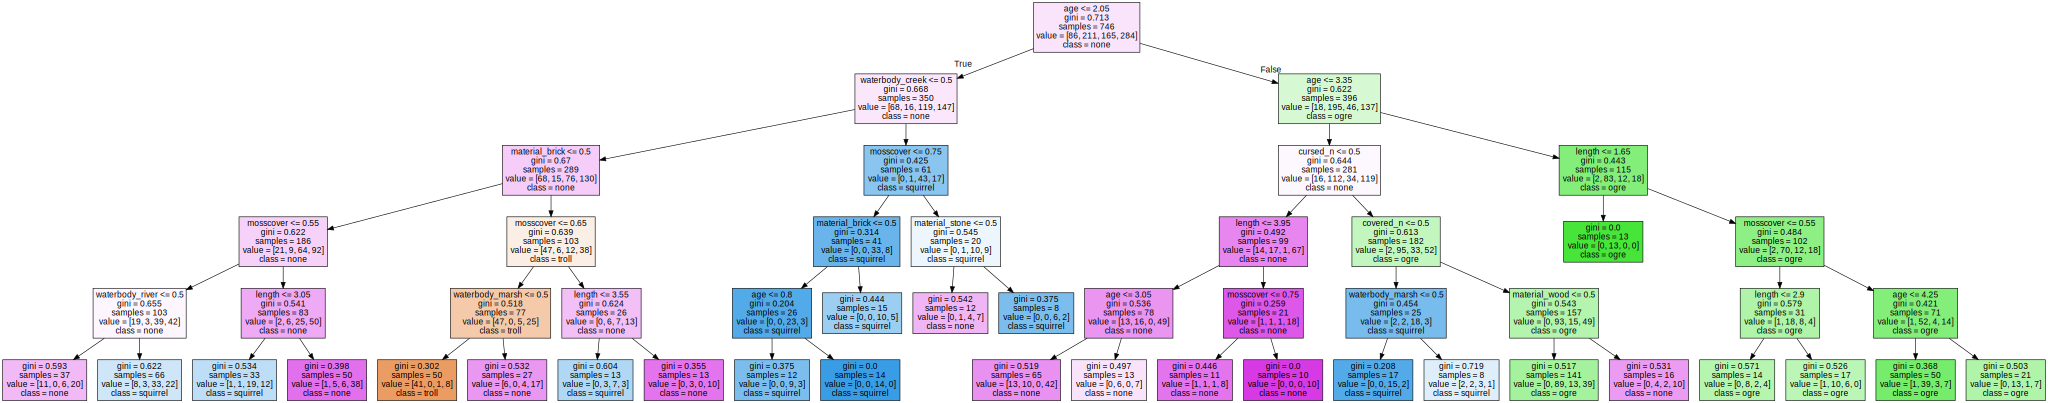

In [7]:
labels = y.value_counts() # sets labels to the value_counts() of y

# uses export_graphviz function from tree library to visualize decision tree
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=x.columns,
                                class_names=labels.index.values,
                                filled=True)

# Draws graph
graph = graphviz.Source(dot_data, format="png")
graph

## A

**Using your decision tree plot, determine the predicted guardian class for a bridge that is less than 2.05 epochs old, crosses over a marsh, is made of brick, and has 45% moss-cover.**

For this bridge we would predict there woul dbe no guardian, because 17 of the 27 bridges that met all these same criteria had no guardian at them (which was the most common outcome)

# Q2

**Now test the accuracy of your model by applying it to the test set and using the `classification_report` function to evaluate accuracy.**

**Let's also view the predicted vs actual class by adding on predictions and y_test as columns to x_test and view this data as a confusion matrix.**

In [8]:
predictions = model.predict(x_test) # predicts onto test set using model

# adds columns from predictions and the y_test to x_test
x_test['predicted_class'] = predictions
x_test['actual_class'] = y_test



In [9]:
x_test.head()

,age,length,mosscover,material_brick,material_stone,material_wood,covered_n,covered_y,cursed_n,cursed_y,waterbody_creek,waterbody_marsh,waterbody_river,predicted_class,actual_class
143,1.6,2.8,0.7,0,0,1,0,1,0,1,0,1,0,squirrel,troll
229,2.7,3.9,0.4,0,1,0,1,0,1,0,0,0,1,ogre,ogre
116,3.9,4.2,0.8,0,1,0,1,0,0,1,0,0,1,ogre,ogre
134,0.5,1.9,0.3,0,0,1,1,0,1,0,0,1,0,troll,troll
569,0.6,1.8,0.7,1,0,0,1,0,0,1,0,1,0,squirrel,squirrel


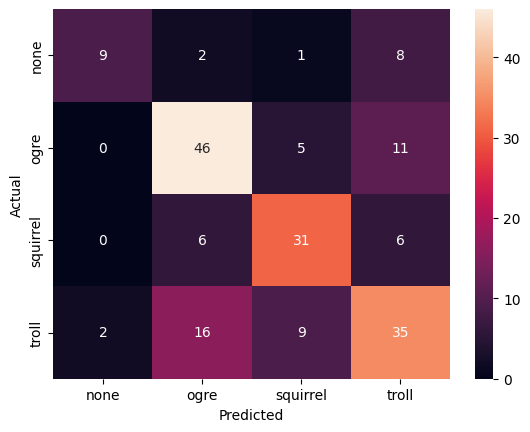

In [10]:
# creates subset of df object called 'conf' with just predicted and actual guardian classes
conf = pd.DataFrame(x_test, columns=['actual_class','predicted_class'])
confusion_matrix = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

# specifies confusion matrix paramters
sns.heatmap(confusion_matrix, annot=True)
sns.set(rc={'figure.figsize':(12,10)})

# plots confusion matrix with sns using heatmap
plt.show()

In [11]:
# prints classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        none       0.82      0.45      0.58        20
        ogre       0.66      0.74      0.70        62
    squirrel       0.67      0.72      0.70        43
       troll       0.58      0.56      0.57        62

    accuracy                           0.65       187
   macro avg       0.68      0.62      0.64       187
weighted avg       0.65      0.65      0.64       187



## A

**For which of the four guardian *predictions* (ogre, troll, squirrel, none) was your model most accurate? For which was it least? For each provide how often (i.e., what percentage class precision?) that prediction was accurate.**

Our model was most accurate in predicting None (of all the times is predicted No Guardian, it was correct 82% of the time). It was least accurate in predicting troll (of all the times it predicted Troll, it was only correct 58% of the time).

## B

**For which of the four *actual* guardian outcomes was your model most accurate? Least? For both, give the class recall.**

The highest recall was for ogre at 74%, meaning 74% of the times when the guardian was actually an ogre, the model predicted ogre. The lowest recall was for none at 45%, meaning 45% of the times when there was no guardian, the model predicted none.

# Q3

**Using the same dataset, create and performance-test a new decision tree model by adjusting at least two parameters of the Decision Tree (criterion, maximal depth, or minimal leaf size).**

In [20]:
# specifies DecisionTreeClassifier paramters for model_2
model_2 = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=6, min_samples_leaf=10)

model_2.fit(x_train, y_train) # fits model_2 to training sets

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=100)

In [ ]:
# drops out predicted and actual_class vars from x_test
x_test = x_test.drop(columns = ['predicted_class', 'actual_class'])

In [21]:
predictions = model_2.predict(x_test) # fits model_2 to x_test
print(classification_report(y_test, predictions)) # prints classification report

              precision    recall  f1-score   support

        none       0.82      0.45      0.58        20
        ogre       0.65      0.73      0.69        62
    squirrel       0.77      0.53      0.63        43
       troll       0.53      0.66      0.59        62

    accuracy                           0.63       187
   macro avg       0.69      0.59      0.62       187
weighted avg       0.66      0.63      0.63       187



## A

**Was this model more or less accurate than your previous model? How did you make that determination?**

Model 1 was more accurate than model 2, the accracy of model 1 was 65%, while model 2 was only 63%

## B

**Why might a model with more leaves (terminal nodes) on the decision tree itself actually end up being less accurate on testing data than one with fewer?**

Having too many terminal nodes (leaves) can lead to overfitting the model, leading to poor test set accuracy.

# Q4

**Using the `griselmoor-routes.csv` dataset, apply your best decision tree model to determine which of the three routes you would advise Snarl and companions to travel (assume that bridge encounters present the only death risk and that all routes are otherwise the same).**

In [22]:
# imports griselmoor-routes dataset to new dataframe 'df_2'
df_2 = pd.read_csv('/content/griselmoor-routes.csv')
# replace with code to view heading
df_2.head()

,routeid,material,age,length,mosscover,covered,cursed,waterbody
0,1,stone,4.0,3.0,0.8,n,n,river
1,1,wood,1.6,4.0,0.6,n,y,marsh
2,1,wood,1.1,1.1,0.1,y,n,creek
3,2,brick,2.8,3.8,0.6,n,y,river
4,2,stone,3.5,4.6,0.8,n,n,marsh


In [23]:
x = df_2.drop(['routeid'], axis=1) # assigns IVs to object x
x = pd.get_dummies(data = x, drop_first=False) # produces dummy codes for categorical IVs in x

# predicts on x using best performing model
predictions = model.predict(x)
proba = np.max(model.predict_proba(x), axis=1)

In [24]:
# adds predictions column to griselmoor-routes df
df_2['predicted_class'] = predictions
df_2['predicted_prob'] = proba
df_2

,routeid,material,age,length,mosscover,covered,cursed,waterbody,predicted_class,predicted_prob
0,1,stone,4.0,3.0,0.8,n,n,river,ogre,0.780000
1,1,wood,1.6,4.0,0.6,n,y,marsh,troll,0.760000
2,1,wood,1.1,1.1,0.1,y,n,creek,squirrel,1.000000
3,2,brick,2.8,3.8,0.6,n,y,river,troll,0.646154
4,2,stone,3.5,4.6,0.8,n,n,marsh,ogre,0.780000
5,2,wood,0.9,2.2,1.0,n,n,marsh,squirrel,0.575758
6,2,brick,1.1,3.9,0.3,n,n,river,none,0.820000
7,2,stone,2.5,3.5,0.6,n,n,river,ogre,0.631206
8,3,stone,4.4,4.6,0.7,n,y,river,ogre,0.619048
9,3,stone,3.5,1.9,0.4,n,n,creek,ogre,0.571429


## A

**Use the `groupby` function to provide an insight into the frequency of predicted encounters (i.e., `predicted_class`) with the different guardians by `routeid`.**

In [25]:
# uses groupby to view counts of predicted classes by route
df_2.groupby(['routeid', 'predicted_class'])['routeid'].count().unstack(0)

routeid,1,2,3
predicted_class,,,
none,NaN,1.0,1.0
ogre,1.0,2.0,2.0
squirrel,1.0,1.0,NaN
troll,1.0,1.0,1.0


## B
**Which route would you recommend to Snarl and his companions to safely travel through Griselmoor? Explain why you chose to recommend this route.**

Snarl and his companions should take route 1 because you have the least likelihood of running into the magical creatures. You are twice as likely to run into ogres on the other routes.